#  Importar pacotes
## pandas, numpy, matplotlib.pyplot, seaborn
## sklearn: LogisticRegression, train_test_split, confusion_matrix

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [0]:
# x e y gerados manualmente

x = np.array([100,120,150,170,200,200,202,203,205,210,215,250,270,300,305,310])

# Gerando y com valores binários (0/1)
y = np.array([1,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0])

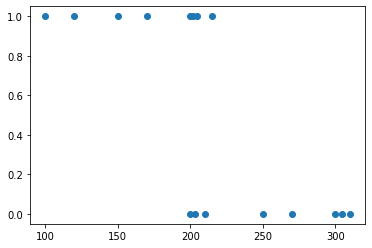

In [5]:
# gráfico (scatter) dos pontos
plt.scatter(x,y);

In [0]:
# Criar conjuntos de treino e teste (test_size=0.4, random_state=2020)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=2020)

In [0]:
# Definir técnica/modelo
lr=LogisticRegression()

In [9]:
# Ajustar os pontos do conjunto de treino utilizando a técnica anteriormente definida
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Fazer predição no conjunto de teste, utilizando o modelo lr anteriormente ajudstado
y_pred=lr.predict(x_test)

In [11]:
# Verificar Matriz de Confusão
confusion_matrix(y_test, y_pred)

array([[3, 0],
       [1, 3]])

In [0]:
# ATENÇÃO!!!
# Predição está nas linhas ou nas colunas?

In [12]:
print("y_test",y_test)
print("y_pred",y_pred)

y_test [1 1 1 1 0 0 0]
y_pred [1 0 1 1 0 0 0]


In [0]:
# Ainda falta explicitar na matriz qual linha é '0' e qual linha é '1'. Idem para 'coluna'

In [16]:
# Para rotular, vamos usar um DataFrame com os índices (linhas) e colunas
colunas = np.unique(y_test)
a = confusion_matrix(y_test, y_pred, labels=colunas)
pd.DataFrame(a, index=colunas, columns=colunas)

,0,1
0,3,0
1,1,3


In [17]:
# Outro jeito de gerar uma Matriz de Confusão com rótulos, utilizando 'crosstab' (Pandas)
pd.crosstab(y_test, y_pred, rownames=['Obs'], colnames=['Pred'], margins=True)

Pred,0,1,All
Obs,,,
0,3,0,3
1,1,3,4
All,4,3,7


In [20]:
# Verificar a acurácia do modelo (score)
lr.score(x_test, y_test)

0.8571428571428571

In [21]:
# Verificar a probabilidade associada a cada registro
lr.predict_proba(x_test)

array([[4.35660369e-01, 5.64339631e-01],
       [7.46402516e-01, 2.53597484e-01],
       [6.13052570e-04, 9.99386947e-01],
       [8.83791909e-03, 9.91162081e-01],
       [6.53263034e-01, 3.46736966e-01],
       [9.97494238e-01, 2.50576224e-03],
       [9.99929193e-01, 7.08071285e-05]])

In [22]:
print("y_test",y_test)
print("y_pred",y_pred)

y_test [1 1 1 1 0 0 0]
y_pred [1 0 1 1 0 0 0]


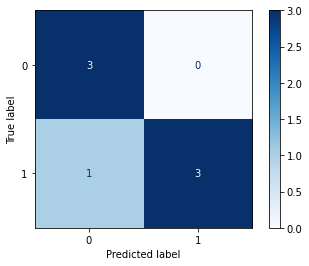

In [24]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(lr, x_test, y_test, cmap='Blues', values_format='.3g');